# Прототип модели для предсказания коэффициента восстановления золота из золотосодержащей руды

# Задача

Подготовить прототип модели машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды.

# Шаг 1. Подготовка данных

In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)
except FileNotFoundError:
    data_train = pd.read_csv('gold_recovery_train_new.csv', index_col='date', parse_dates=True)
    data_test = pd.read_csv('gold_recovery_test_new.csv', index_col='date', parse_dates=True)
    data_full = pd.read_csv('gold_recovery_full_new.csv', index_col='date', parse_dates=True)

In [3]:
# функция открытия набора данных
def open_file(df):
    display(df.head(10))
    display(df.info())

In [4]:
open_file(data_train)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

None

In [5]:
open_file(data_test)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,-497.903666,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,-497.923683,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,-503.451306,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,-499.890350,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

None

In [6]:
open_file(data_full)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

None

## Описание данных

### Технологический процесс

Добыча руды -> Первичная обработка -> Флотация -> Два этапа очистки -> Финальный концентрат

### Наименование признаков

Наименование признаков должно быть такое:
    
[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag
    
Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

Технологический процесс:
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

<b>Предварительный вывод</b>
- данные загружены
- данные соответствуют описанию
- присутствуют незначительные пропуски данных
- кол-во признаков в тренировочных данных больше чем в тестовый данных

## Проверка расчета эффективности обогащения

In [7]:
C = data_train.loc[~data_train['rougher.output.recovery'].isna(), 'rougher.output.concentrate_au']
F = data_train.loc[~data_train['rougher.output.recovery'].isna(), 'rougher.input.feed_au']
T = data_train.loc[~data_train['rougher.output.recovery'].isna(), 'rougher.output.tail_au']
rougher_recovery_teor = C * (F - T) / (F * (C - T)) * 100
rougher_recovery_train_fact = data_train.loc[~data_train['rougher.output.recovery'].isna(), 'rougher.output.recovery']

In [8]:
print('MAE между нашим расчетом и предоставленным:', 
      mean_squared_error(rougher_recovery_teor, 
                         rougher_recovery_train_fact)
     )

MAE между нашим расчетом и предоставленным: 2.1779764378612226e-28


<b>Предварительный вывод:</b> расчет эффективности обогащения выполнен корректно, так как MAE между нашими расчетами и Заказчика незначительное

## Анализ признаков, недоступных в тестовой выборке. Что за параметры? К какому типу относятся?

Выделим отсутствующие в test колонки

In [9]:
col_dif = set(data_train.columns) - set(data_test.columns)
col_dif

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тренировочном датасете отсутствуют значения концентраций металлов на финальной стадии, а также общей эффективности и отвальных хвостов

## Предобработка данных

Оставим в тренировочной выборке столбцы из тестовой и дополним целевыми признаками

In [10]:
train_col = [column for column in data_train.columns if column not in col_dif] \
                                    + ['rougher.output.recovery', 'final.output.recovery']

In [11]:
data_train = data_train[train_col]

В тестовый набор добавим целевые признаки из полной выборки

In [12]:
data_test = data_test.join(data_full[['rougher.output.recovery', 'final.output.recovery']])

In [13]:
for column in data_train.columns:
    print(f'Кол-во пропусков в {column}: {round(data_train[column].isna().sum() / len(data_train), 3)}%')

Кол-во пропусков в primary_cleaner.input.sulfate: 0.001%
Кол-во пропусков в primary_cleaner.input.depressant: 0.002%
Кол-во пропусков в primary_cleaner.input.feed_size: 0.0%
Кол-во пропусков в primary_cleaner.input.xanthate: 0.007%
Кол-во пропусков в primary_cleaner.state.floatbank8_a_air: 0.0%
Кол-во пропусков в primary_cleaner.state.floatbank8_a_level: 0.0%
Кол-во пропусков в primary_cleaner.state.floatbank8_b_air: 0.0%
Кол-во пропусков в primary_cleaner.state.floatbank8_b_level: 0.0%
Кол-во пропусков в primary_cleaner.state.floatbank8_c_air: 0.0%
Кол-во пропусков в primary_cleaner.state.floatbank8_c_level: 0.0%
Кол-во пропусков в primary_cleaner.state.floatbank8_d_air: 0.0%
Кол-во пропусков в primary_cleaner.state.floatbank8_d_level: 0.0%
Кол-во пропусков в rougher.input.feed_ag: 0.0%
Кол-во пропусков в rougher.input.feed_pb: 0.007%
Кол-во пропусков в rougher.input.feed_rate: 0.001%
Кол-во пропусков в rougher.input.feed_size: 0.01%
Кол-во пропусков в rougher.input.feed_sol: 0.006%
К

В оставшихся признаках кол-во пропусков несущественно. В описании проекта сказано, что соседние по времени параметры часто схожи, поэтому спокойно заполним пропуски соседними значениями

In [14]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

In [15]:
# проверка таблиц на пропуски и тип данных
# data_train.info()

In [16]:
# проверка таблиц на пропуски и тип данных
# data_test.info()

<b>Выводы</b>
- данные загружены, соответствуют описанию, присутствуют незначительные пропуски данных
- кол-во признаков в тренировочных данных больше чем в тестовый данных. В связи с чем выделены признаки из тестовой выборки и целевые признаки для использования в подготовке данных для обучения модели
- выделены признаки коррелирующие между собой и удалены из датасетов
- пропуски заполнены на основе имеющихся данных

# Шаг 2. Анализ данных

## Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

In [17]:
# создадим словарь необходимых значений
metals = {'серебра':['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag' ],
          'золота':['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au' ],
          'свинца':['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb' ]}

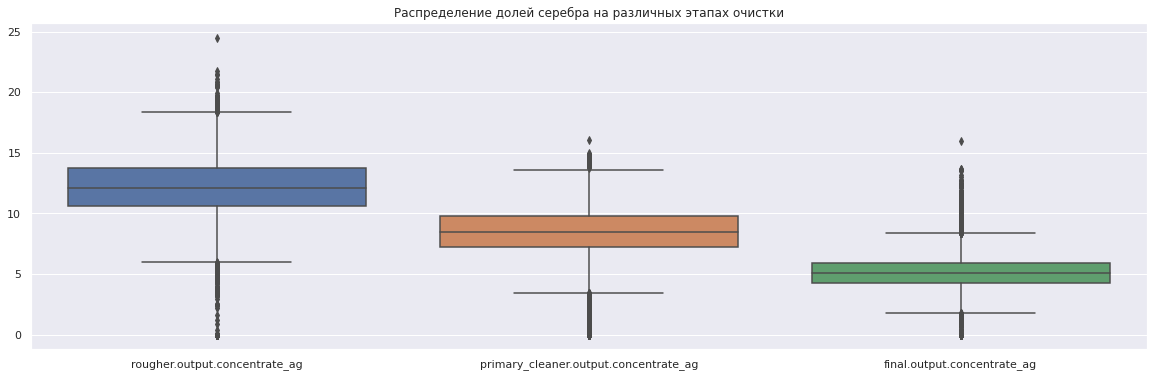

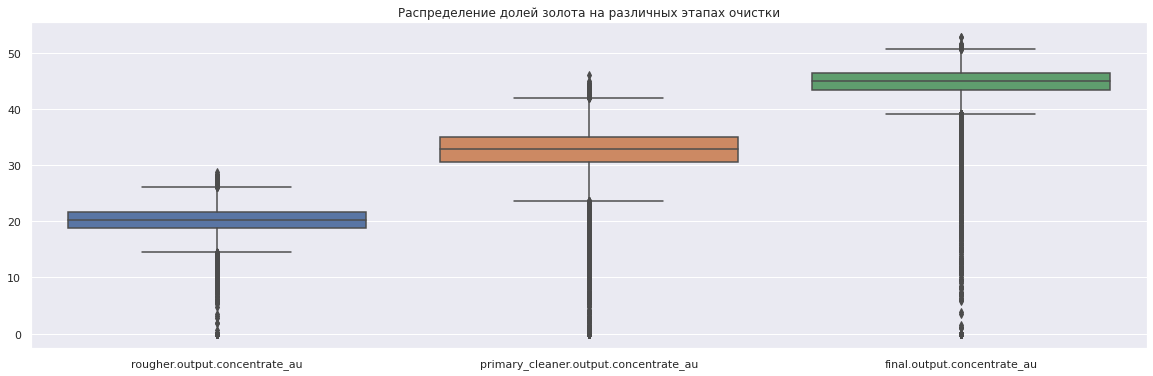

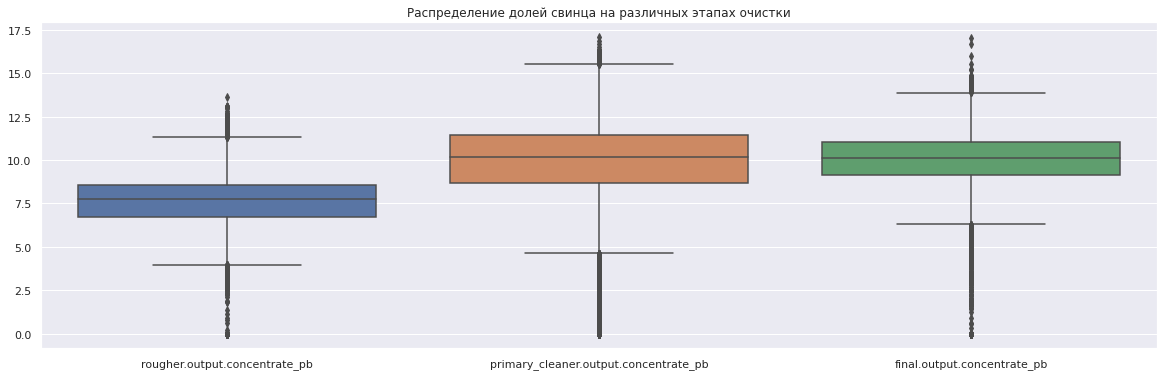

In [18]:
sns.set()
for metal in metals:
    plt.figure(figsize=(20,6))
    sns.boxplot(data = data_full[metals[metal]])
    plt.title(f'Распределение долей {metal} на различных этапах очистки')
    plt.show()

Графики выше показывают увеличение концентрации золота после каждого этапа очистки, падение концентрации серебра и примерное сохранение доли свинца

## Анализ распределения размеров гранул сырья на обучающей и тестовой выборках

In [19]:
feed_size_test = data_test['rougher.input.feed_size']
feed_size_train = data_train['rougher.input.feed_size']

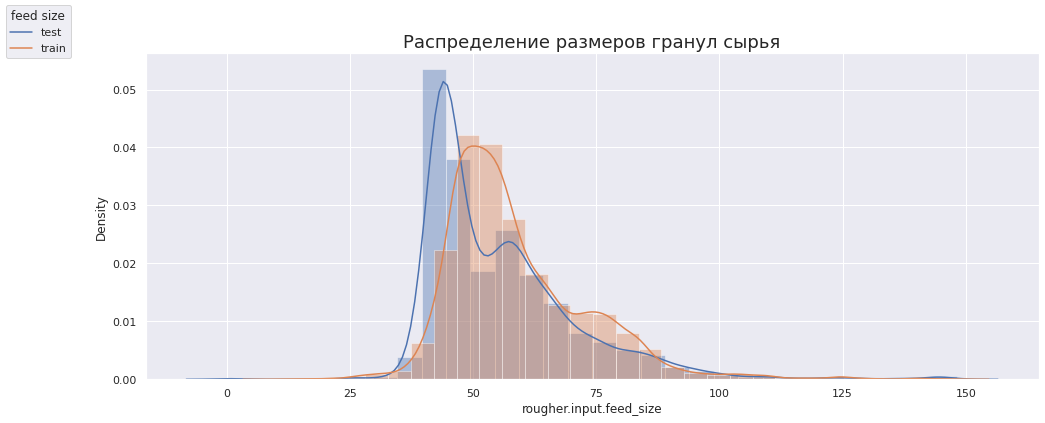

In [20]:
sns.set()

f, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.set_title('Распределение размеров гранул сырья', fontsize=18)
sns.distplot(feed_size_test.loc[feed_size_test < 150], bins=30)
sns.distplot(feed_size_train.loc[feed_size_train < 150], bins=30)
f.legend(labels=['test', 'train'], loc=2, title='feed size')
plt.show()

Исходя из графика распределения размеров гранул не сильно отличаются на тестовой и обучающей выборках

## Анализ суммарной концентрации всех веществ на разных стадиях тех. процесса

In [21]:
data_full['feed_con_full'] = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] +\
            data_full['rougher.input.feed_sol'] + data_full['rougher.input.feed_au']
data_full['rougher_conc_full'] = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] +\
            data_full['rougher.output.concentrate_sol'] + data_full['rougher.output.concentrate_au']
data_full['final_conc_full'] = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] +\
            data_full['final.output.concentrate_sol'] + data_full['final.output.concentrate_au']

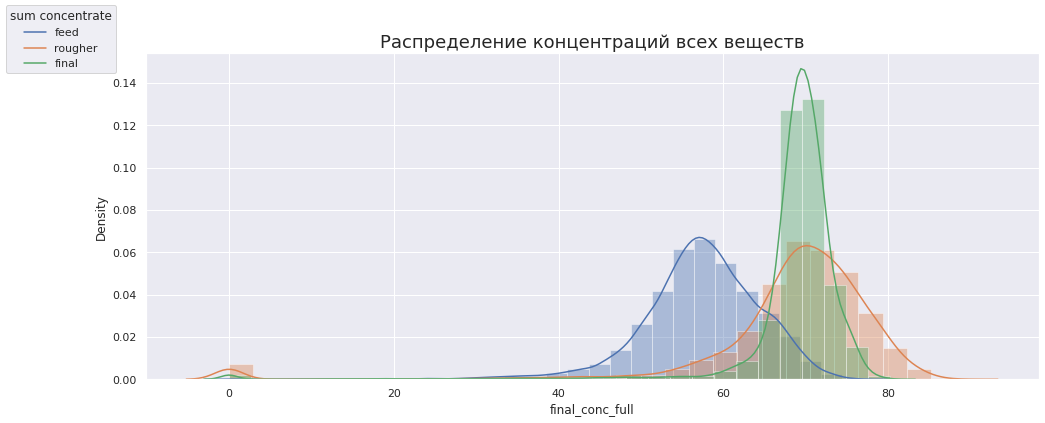

In [22]:
f, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.set_title('Распределение концентраций всех веществ', fontsize=18)
sns.distplot(data_full['feed_con_full'], bins=30)
sns.distplot(data_full['rougher_conc_full'], bins=30)
sns.distplot(data_full['final_conc_full'], bins=30)
f.legend(labels=['feed', 'rougher', 'final'], loc=2, title='sum concentrate')
plt.show()

На графике выше видны объекты с общей концентрацией веществ равной нулю

Удалим объекты в обучающей выборке с нулевой суммарной концентрацией металлов на всех этах очистки

In [23]:
before_del_zero_data = len(data_train)
data_train = data_train[
    (data_full['feed_con_full'] != 0) & 
    (data_full['rougher_conc_full'] != 0) & 
    (data_full['final_conc_full'] != 0)
]
print('Кол-во удаленных объектов:', before_del_zero_data - len(data_train))

Кол-во удаленных объектов: 354


<b>Выводы</b>
- проанализировано изменение концентрации металлов на разных стадиях очистки. Концентрация золота увеличивается после каждого этапа, концентрация серебра падает, концентрация свинца остается стабильно невысокой
- размер гранул сырья на входе тех. процесса в тренировочной и тестовой выборках схож
- анализ распределения суммарных концентраций всех веществ на всех стадиях тех. процесса показал аномальные нулевые значения сразу всех веществ. Удаление из тренировочной выборки нулевых суммарных концетраций в отдельных этапах очистки не считаю разумным. Все таки мы не эксперты в вопросах очистки золотоносной руды, возможно при каких-то условиях подобные данные возможны. А ситуации, когда все суммарные концентрации одновременно нулевые, явно ошибка в данных. Подобные записи удалены

# Шаг 3. Построение модели

## Функция sMAPE

In [24]:
def smape(target, pred):

    return ((1/len(target)) * np.sum(2 * np.abs(target - pred) / (np.abs(target) + np.abs(pred)))) * 100

In [25]:
smape_scoring = make_scorer(smape, greater_is_better=False)

In [26]:
def smape_fin(rough, final):
    return .25 * rough + .75 * final

## Построение модели

Формируем список признаков для предсказания эффективности обогащения после первого этапа

In [27]:
rougher_features = [column for column in data_train.columns if ('rougher' in column)]
rougher_features

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'rougher.output.recovery']

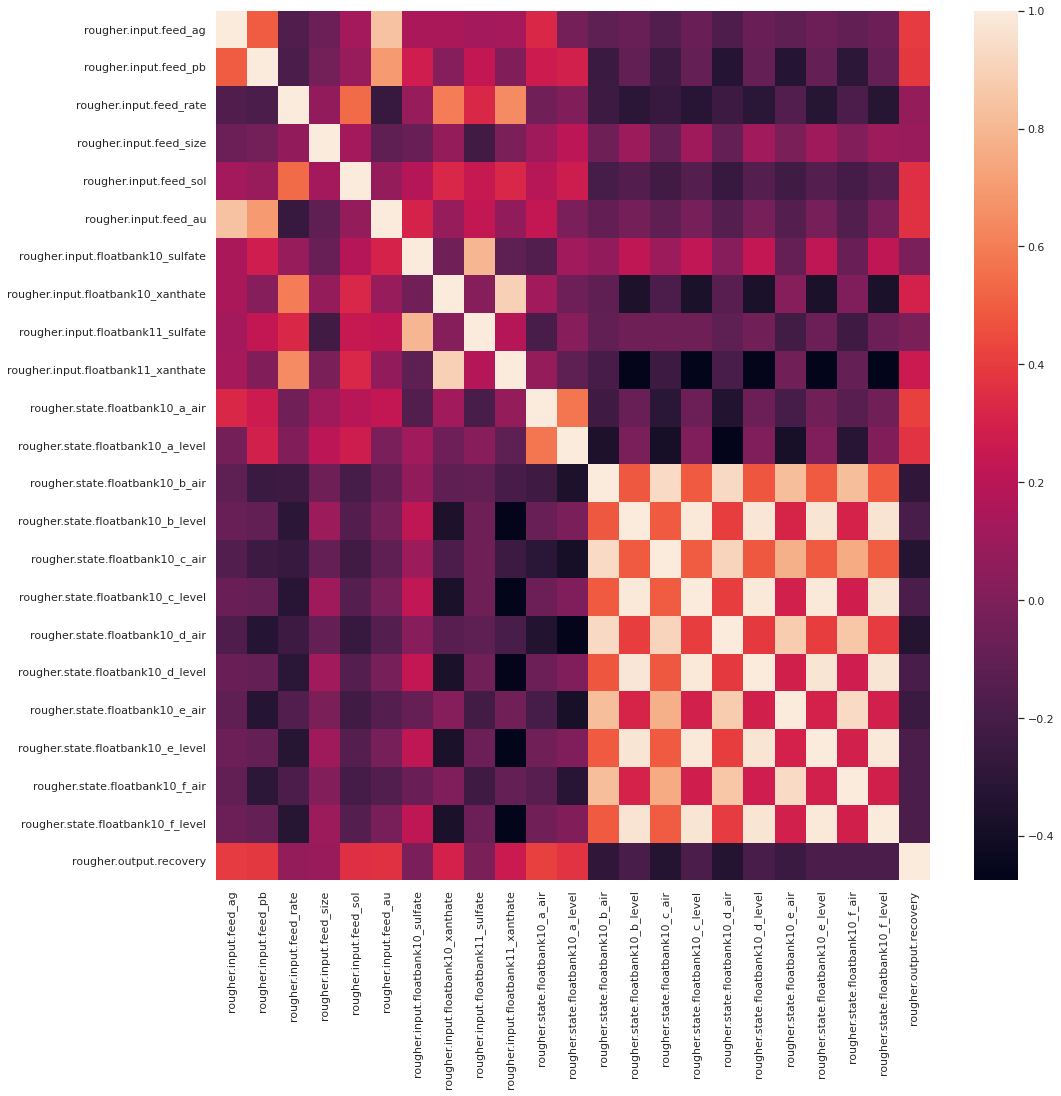

In [28]:
plt.figure(figsize=(16,16))
sns.heatmap(data_train[rougher_features].corr());

Оставляем признаки с наименьшей корреляцией

In [29]:
rougher_features = ['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level']

In [30]:
final_features = []
for column in data_train.columns:
    if not("rougher" in column):
        final_features.append(column)

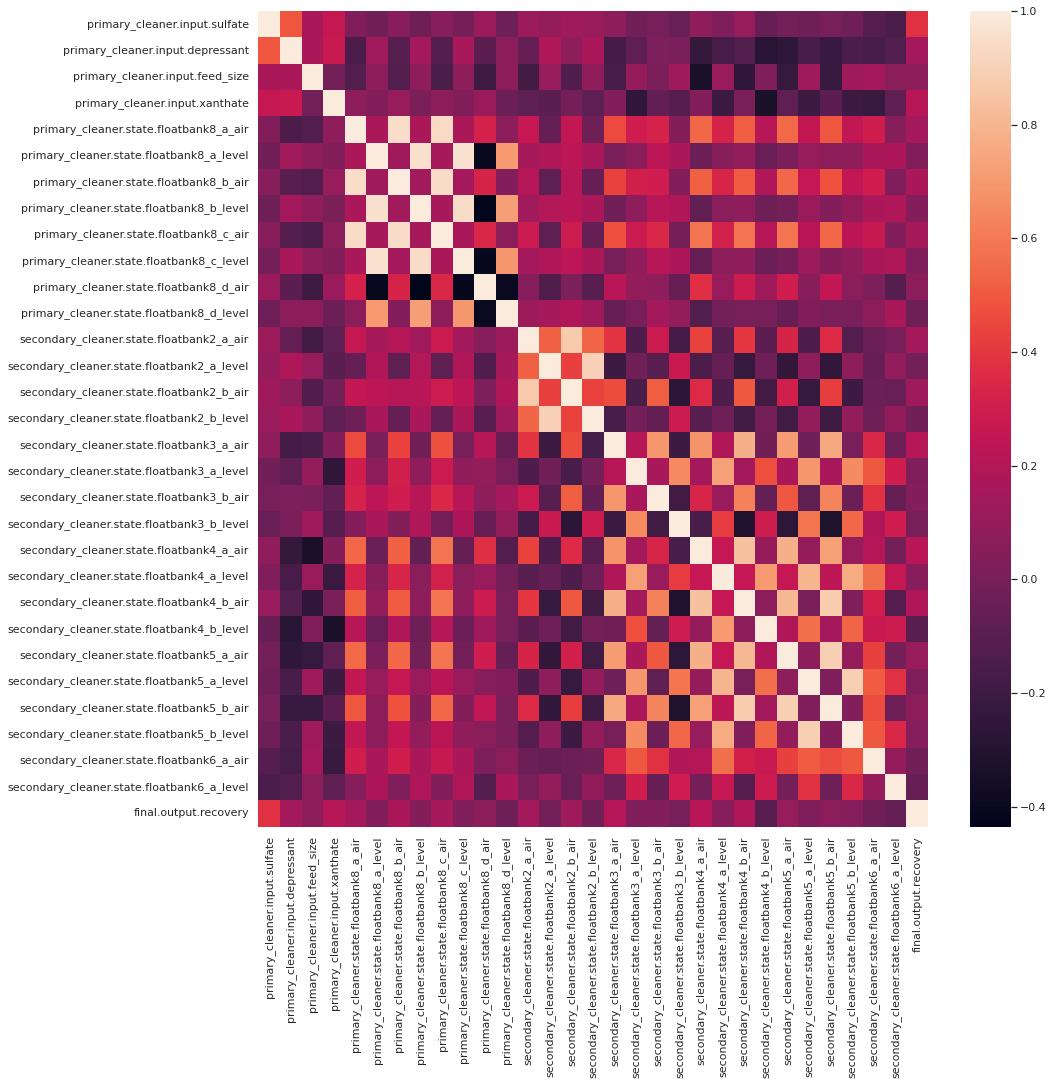

In [31]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_train[final_features].corr());

In [32]:
final_features = ['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_a_level'
]

In [33]:
X_train_rougher = data_train[rougher_features]
Y_train_rougher = data_train['rougher.output.recovery']
X_test_rougher = data_test[rougher_features]
Y_test_rougher = data_test['rougher.output.recovery']

print('Размер тренировочной выборки начального этапа:\t', X_train_rougher.shape)
print('Размер тестовой выборки начального этапа:\t', X_test_rougher.shape)
print()

X_train_final = data_train[final_features+rougher_features]
Y_train_final = data_train['final.output.recovery']
X_test_final = data_test[final_features+rougher_features]
Y_test_final = data_test['final.output.recovery']

print('Размер тренировочной выборки финального этапа:\t', X_train_final.shape)
print('Размер тестовой выборки финального этапа:\t',X_test_final.shape)

Размер тренировочной выборки начального этапа:	 (13795, 10)
Размер тестовой выборки начального этапа:	 (5290, 10)

Размер тренировочной выборки финального этапа:	 (13795, 18)
Размер тестовой выборки финального этапа:	 (5290, 18)


## Сравнение моделей

In [34]:
%%time

rand = 12345
pipelines = []

pipelines.append(('Linear Regression', (Pipeline([('std', StandardScaler()), ('lr', LinearRegression())]))))
pipelines.append(('Decision Tree Regressor', (Pipeline([('dtr', DecisionTreeRegressor(random_state=rand))]))))
pipelines.append(('Random Forest Regressor', (Pipeline([('rfr', RandomForestRegressor(random_state=rand))]))))
pipelines.append(('K Neighbors Regressor', (Pipeline([('std', StandardScaler()), ('knr', KNeighborsRegressor(n_neighbors=50))]))))
pipelines.append(('Lasso Regressor', (Pipeline([('std', StandardScaler()), ('las', Lasso(random_state=rand))]))))
pipelines.append(('Ridge Regressor', (Pipeline([('std', StandardScaler()), ('rid', Ridge(random_state=rand))]))))
pipelines.append(('Catboost Regressor', (Pipeline([('cat', CatBoostRegressor(random_state=rand, verbose=False))]))))

model_name = []
results = []

print('Кол-во групп: 5')
for name_pipe, model in pipelines:
    kfold = KFold(n_splits=5, shuffle=True)
    crossval_rougher = cross_val_score(model, X_train_rougher, Y_train_rougher, cv=kfold, scoring=smape_scoring)
    crossval_final = cross_val_score(model, X_train_final, Y_train_final, cv=kfold, scoring=smape_scoring)
    results.append(abs(smape_fin(crossval_rougher, crossval_final)))
    model_name.append(name_pipe)
    print('--------------------------------------')
    print('Модель:', name_pipe)
    print('Среднее значение sMAPE:', np.mean(results[-1]))
    print('Стандартное отклонение sMAPE:', np.std(results[-1]))
    print('--------------------------------------')

Кол-во групп: 5
--------------------------------------
Модель: Linear Regression
Среднее значение sMAPE: 7.682925121073336
Стандартное отклонение sMAPE: 0.17619692476828686
--------------------------------------
--------------------------------------
Модель: Decision Tree Regressor
Среднее значение sMAPE: 7.178275467678537
Стандартное отклонение sMAPE: 0.2433491449592602
--------------------------------------
--------------------------------------
Модель: Random Forest Regressor
Среднее значение sMAPE: 5.032585012235579
Стандартное отклонение sMAPE: 0.06287099185190985
--------------------------------------
--------------------------------------
Модель: K Neighbors Regressor
Среднее значение sMAPE: 6.136135531730991
Стандартное отклонение sMAPE: 0.10368769876324357
--------------------------------------
--------------------------------------
Модель: Lasso Regressor
Среднее значение sMAPE: 7.998564960062201
Стандартное отклонение sMAPE: 0.11045547205720956
------------------------------

## Проверка на тестовой выборке

In [35]:
pipe_rougher = Pipeline([('std', StandardScaler()), ('rfr', RandomForestRegressor(random_state=rand))])
pipe_rougher.fit(X_train_rougher, Y_train_rougher)
predicted_rougher = pipe_rougher.predict(X_test_rougher)
rougher_smape_test = smape(Y_test_rougher, predicted_rougher)

In [36]:
pipe_final = Pipeline([('std', StandardScaler()), ('rfr', RandomForestRegressor(random_state=rand))])
pipe_final.fit(X_train_final, Y_train_final)
predicted_final = pipe_final.predict(X_test_final)
final_smape_test = smape(Y_test_final, predicted_final)

In [37]:
print('Значение sMAPE на тестовой выборке:', smape_fin(rougher_smape_test, final_smape_test))

Значение sMAPE на тестовой выборке: 9.128897442883252


Проверим результат константной модели

In [38]:
dummy_regr_rougher = DummyRegressor(strategy='median')
dummy_regr_final = DummyRegressor(strategy='median')

dummy_regr_rougher.fit(X_train_rougher, Y_train_rougher)
dummy_regr_final.fit(X_train_final, Y_train_final)

dummy_predicted_rougher = dummy_regr_rougher.predict(X_test_rougher)
dummy_predicted_final = dummy_regr_final.predict(X_test_final)

rougher = smape(Y_test_rougher, dummy_predicted_rougher) 
final = smape(Y_test_final, dummy_predicted_final)

dummy_final = smape_fin(rougher, final)
print('Значение sMAPE на константной модели:', dummy_final)

Значение sMAPE на константной модели: 9.43899456364264


Проверим еще модель KNR

In [39]:
pipe_rougher = Pipeline([('std', StandardScaler()), ('knr', KNeighborsRegressor(n_neighbors=50))])
pipe_rougher.fit(X_train_rougher, Y_train_rougher)
predicted_rougher = pipe_rougher.predict(X_test_rougher)
rougher_smape_test = smape(Y_test_rougher, predicted_rougher)

pipe_final = Pipeline([('std', StandardScaler()), ('knr', KNeighborsRegressor(n_neighbors=50))])
pipe_final.fit(X_train_final, Y_train_final)
predicted_final = pipe_final.predict(X_test_final)
final_smape_test = smape(Y_test_final, predicted_final)

print('Значение sMAPE на тестовой выборке для KNR:', smape_fin(rougher_smape_test, final_smape_test))

Значение sMAPE на тестовой выборке для KNR: 8.613851666828266


Проверим еще модель Catboost

In [40]:
pipe_rougher = Pipeline([('cat', CatBoostRegressor(random_state=rand, verbose=False))])
pipe_rougher.fit(X_train_rougher, Y_train_rougher)
predicted_rougher = pipe_rougher.predict(X_test_rougher)
rougher_smape_test = smape(Y_test_rougher, predicted_rougher)

pipe_final = Pipeline([('cat', CatBoostRegressor(random_state=rand, verbose=False))])
pipe_final.fit(X_train_final, Y_train_final)
predicted_final = pipe_final.predict(X_test_final)
final_smape_test = smape(Y_test_final, predicted_final)

print('Значение sMAPE на тестовой выборке для CatBoost:', smape_fin(rougher_smape_test, final_smape_test))

Значение sMAPE на тестовой выборке для CatBoost: 8.915320420818828


# Выводы

1. данные загружены, соответствуют описанию. Присутствуют незначительные пропуски данных. Кол-во признаков в тренировочных данных больше чем в тестовый данных.
2. Анализ концентраций металлов на различных этап тех. процесса
- концентрация золота увеличивается после каждого этапа, концентрация серебра падает, концентрация свинца остается стабильно невысокой
- размер гранул сырья на входе тех. процесса в тренировочной и тестовой выборках схож
- удалены записи с нулевыми суммарными концентрациями всех металлов на на всех этап очистки
3. Были протестированы несколько моделей. 
- Лучший результат на тренировочной выборке показала модель случайного леса. sMAPE = 5.03
- Лучший результат на тестовой выборке показала модель ближайших соседей. sMAPE = 8.61
- Результат константной модели - 9.4

Вывод: лучше всего по критериям качество/скорость показала себя модель KNR.